# PIK3CA: Effects of Mutation on mTOR

<b> Standard imports for playing with and plotting data frames. </b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

<b> Import CPTAC data </b>

In [2]:
import CPTAC.Endometrial as CPTAC

Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and mTOR proteome abundance 

### Perform a t-test with mutated and non-mutated protein levels

In [4]:
protList = ['MTOR']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

proteomics = proteomics[:100]

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 
        else:
            print("Unsignificant result for ", protein, " ", ttest)

Unsignificant result for  MTOR   Ttest_indResult(statistic=-1.689184441107459, pvalue=0.09446372514305577)


 ### We can now plot the data 

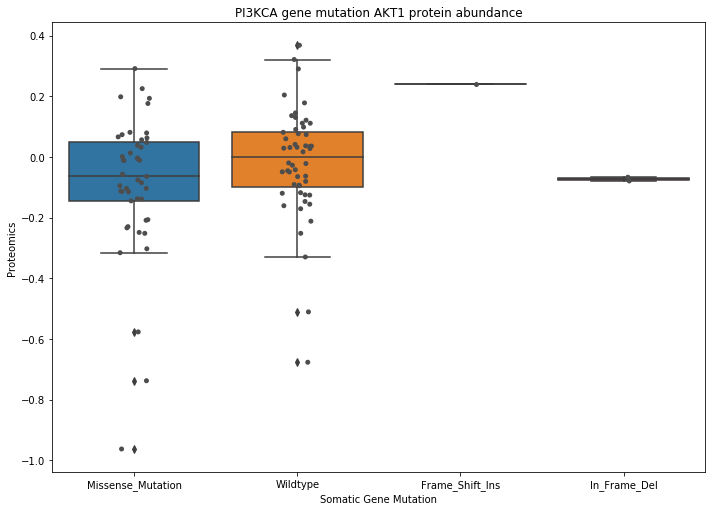

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='MTOR', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation AKT1 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='MTOR',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

<b> We can conclude from these findings that mutated PIK3CA appears to show no effect in AKT1 abundance </b>

# PI3KCA mutation and MTOR phosphoproteome abundance 

In [7]:
sites = phos.columns
p_values = []
site_names = []
protein = 'MTOR'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    pcutoff = 0.05/len(phosphositesdf.columns)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            #print(wtdf[site])
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            if ttest[1] < pcutoff:
                print("Test for ", site, ttest)
            else:
                print("Unsignificant result for ", site, ttest)
                
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))

#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

Test for  LAMTOR1-S27 Ttest_indResult(statistic=4.0872067577766495, pvalue=7.069190147896216e-05)
Unsignificant result for  LAMTOR1-S42 Ttest_indResult(statistic=-0.6085221089942277, pvalue=0.5438134233269379)
Unsignificant result for  LAMTOR1-S45 Ttest_indResult(statistic=-0.9168206994368059, pvalue=0.3728496971980667)
Unsignificant result for  LAMTOR1-S56 Ttest_indResult(statistic=nan, pvalue=nan)
Unsignificant result for  LAMTOR1-S63 Ttest_indResult(statistic=0.9354681429493239, pvalue=0.3516733833239871)
Unsignificant result for  LAMTOR1-S98 Ttest_indResult(statistic=0.03520611762848435, pvalue=0.972350872528652)
Unsignificant result for  LAMTOR1-T48 Ttest_indResult(statistic=-0.6042231786483404, pvalue=0.5511397474455656)
Unsignificant result for  LAMTOR1-T61 Ttest_indResult(statistic=-0.9181061845250669, pvalue=0.3617159477846864)
Unsignificant result for  LAMTOR5-S108 Ttest_indResult(statistic=-1.304397278368258, pvalue=0.1947027038292359)
Unsignificant result for  LAMTOR5-S99 T

/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<b> We can conclude from these findings that PIK3CA appears to have no effect on MTOR phosphoproteomic abundance. </b>

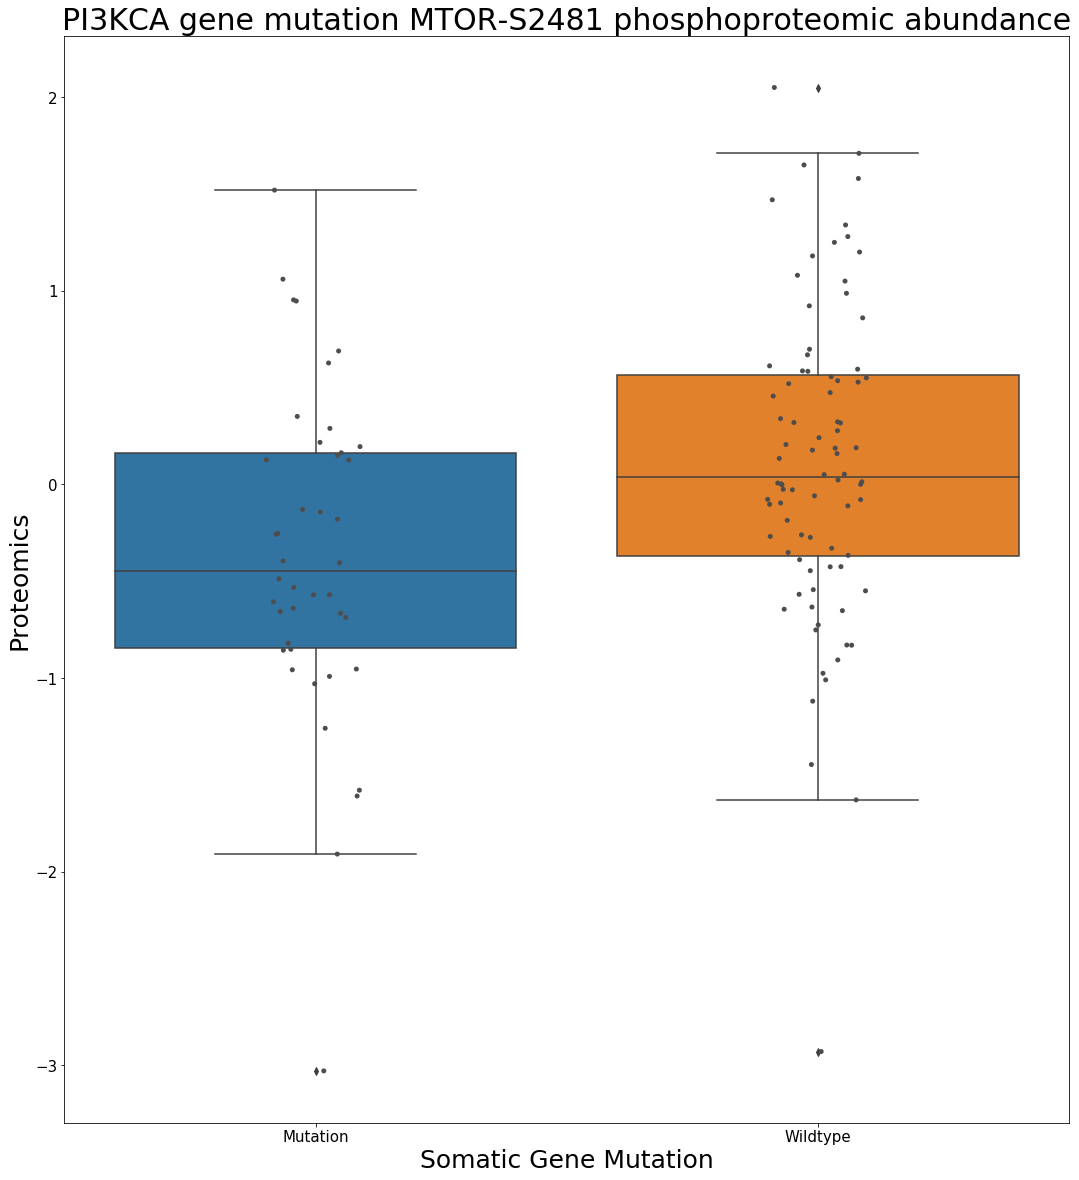

In [9]:
site = 'MTOR-S2481'
sitedf = CPTAC.compare_mutations(phos, protein, gene)

sitedf.loc[sitedf['Mutation'] != 'Wildtype', 'Mutation'] = 'Mutation'
#p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'


a4_dims = (18, 20)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=sitedf, x="Mutation",y=site, ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation "+ site+ " phosphoproteomic abundance", fontsize = '30')
somatic_boxplot = sns.stripplot(data=sitedf, x="Mutation", y=site,jitter=True, color=".3")
somatic_boxplot.set_ylabel('Signal', fontsize='25')
somatic_boxplot.set_xlabel('Signal', fontsize='25')
somatic_boxplot.tick_params(labelsize='15')
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

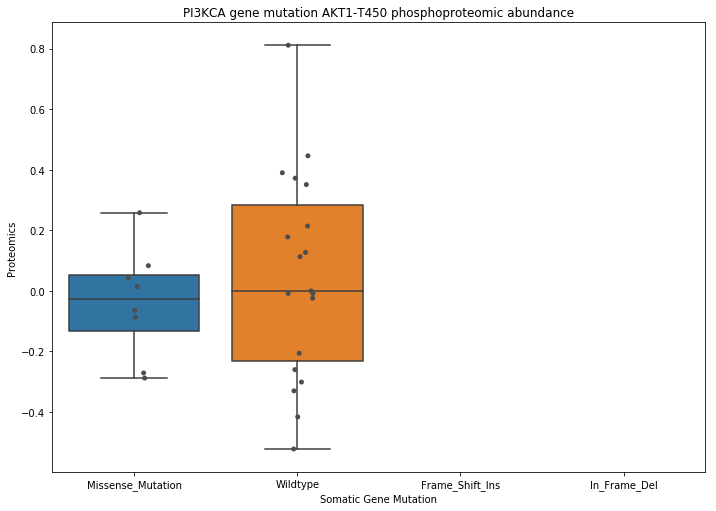

In [21]:
site = 'AKT1-T450'
sitedf = CPTAC.compare_mutations(phos, protein, gene)


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=sitedf, x="Mutation",y=site, ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation "+ site+ " phosphoproteomic abundance")
somatic_boxplot = sns.stripplot(data=sitedf, x="Mutation", y=site,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()